# RetinaFace Tutorial

This notebook provides a tutorial for running inference on a static image in order to detect objects.
The implementation of the [RetinaFaceLearner](https://github.com/opendr-eu/opendr/blob/master/docs/reference/face-detection-2d-retinaface.md) is largely copied from its original
[implementation](https://github.com/deepinsight/insightface).
More information on modifications and license can be found
[here](https://github.com/opendr-eu/opendr/blob/master/src/opendr/perception/object_detection_2d/retinaface/README.md).

First, we need to import the learner and initialize it:

In [12]:
from opendr.perception.object_detection_2d import RetinaFaceLearner

learner = RetinaFaceLearner(device='cuda', backbone='resnet')

Note that we can alter the device (e.g., 'cpu', 'cuda', etc.), on which the model runs, as well as the backbone
architecture from a variety of options ('resnet', 'mnet').

After creating our model, we need to download pre-trained weights.

In [13]:
learner.download(".")

and load our weights:

In [14]:
learner.load("./retinaface_resnet")

Loading model from path:  ./retinaface_resnet/retinaface_resnet
Loaded mxnet model.


Note that you must change the loading direction if you change the backbone of the learner.

We will also download one sample image and load it, so we can use it in OpenDR for testing:

In [15]:
learner.download(".", mode="images")

from opendr.engine.data import Image
img = Image.open("./cov4.jpg")

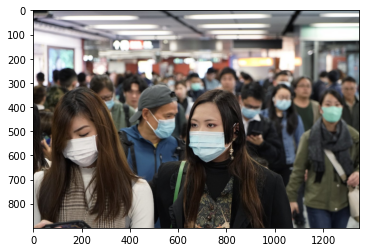

In [16]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img.opencv(), cv2.COLOR_BGR2RGB))

We are now ready to use our model!
The only thing that we have to do is to pass the image through the model.
Note that there are standard data types supported by OpenDR.
However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most
appropriate format:

In [17]:
detections = learner.infer(img)

We can plot the results using a utility function from the Object-Detection-2D module:

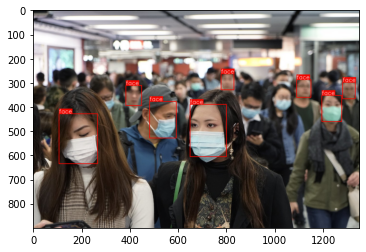

In [18]:
from opendr.perception.object_detection_2d import draw_bounding_boxes

img_annotated = draw_bounding_boxes(img.opencv(), detections, class_names=learner.classes, show=False)


%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))

The `mnet` backbone also outputs whether the detected faces are masked as a second class.
Note that the detection accuracy is slightly decreased using this MobileNet version.

Loading model from path:  ./retinaface_mnet/retinaface_mnet
Detecting masked faces...
Loaded mxnet model.


[11:28:19] ../src/nnvm/legacy_json_util.cc:209: Loading symbol saved by previous version v1.5.0. Attempting to upgrade...
[11:28:19] ../src/nnvm/legacy_json_util.cc:217: Symbol successfully upgraded!


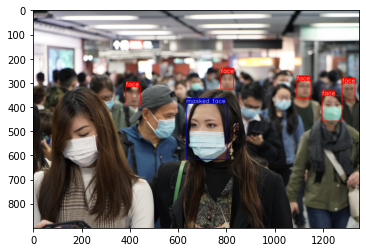

In [19]:
learner = RetinaFaceLearner(device='cuda', backbone='mnet')
learner.download(".")
learner.load("./retinaface_mnet")
detections = learner.infer(img)

img_annotated = draw_bounding_boxes(img.opencv(), detections, class_names=learner.classes, show=False)


%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))